# AutoEncoder

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

載入 MNIST 資料集

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

im_dim = mnist.train.images.shape[1] # 影像維度
lb_dim = mnist.train.labels.shape[1] # 類別數量

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## 建立 AutoEncoder

定義權重、偏差值初始化

In [3]:
def weight_variable(shape, name):
    init = tf.truncated_normal(shape = shape, stddev = 0.1)
    return tf.Variable(init, name)

def bias_variable(shape, name):
    init = tf.constant(0.1, shape = shape)
    return tf.Variable(init, name)

定義 add_Layer

In [4]:
def add_Layer(x, w_shape, b_shape, w_name, b_name):
    W = weight_variable(w_shape, w_name)
    b = bias_variable(b_shape, b_name)
    return tf.nn.relu(tf.matmul(x, W) + b)

定義各層神經元數量

In [5]:
# 784 -> 300 -> 50 -> 5 -> 50 -> 300 -> 784
n_hidden_1   = 300 # 第一層隱藏層
n_hidden_2   = 50  # 第二層隱藏層
n_code_layer = 5   # Code layer

### Input Layer

In [6]:
x = tf.placeholder(tf.float32, shape = [None, im_dim])

### Encoder Layers

In [7]:
e_layer1 = add_Layer(x       , [im_dim    , n_hidden_1]  , [n_hidden_1]  , 'encoder_w1', 'encoder_b1')
e_layer2 = add_Layer(e_layer1, [n_hidden_1, n_hidden_2]  , [n_hidden_2]  , 'encoder_w2', 'encoder_b2')

### Code Layer

In [8]:
c_layer  = add_Layer(e_layer2, [n_hidden_2, n_code_layer], [n_code_layer], 'encoder_w3', 'encoder_b3')

### Decoder Layers

In [9]:
d_layer1 = add_Layer(c_layer , [n_code_layer, n_hidden_2], [n_hidden_2], 'decoder_w1', 'decoder_b1')
d_layer2 = add_Layer(d_layer1, [n_hidden_2, n_hidden_1]  , [n_hidden_1], 'decoder_w2', 'decoder_b2')

### Output Layer

In [10]:
output_layer = add_Layer(d_layer2, [n_hidden_1, im_dim], [im_dim], 'decoder_w3', 'decoder_b3')

定義 loss function 為 mean square error

In [11]:
loss = tf.reduce_mean(tf.square(output_layer - x))

定義 optimize function 為 ADAM最佳化演算法

In [12]:
optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

初始化參數

In [13]:
init = tf.global_variables_initializer()

啟動 Graph

In [14]:
sess = tf.Session()
sess.run(init)

## 訓練模型 & 顯示訓練過程

In [15]:
itera     = 2000 # 迭帶次數
num_batch = 50   # 批次數量

for step in range(itera):
    [batch_xs, batch_ys] = mnist.train.next_batch(num_batch)
    sess.run(optimizer, feed_dict = {x: batch_xs})
    
    if step % 100 == 0:
        print('第 {} 次訓練 loss: {}'.format(step, sess.run(loss, feed_dict = {x: mnist.test.images})))
    
print('訓練完成 loss: {}'.format(sess.run(loss, feed_dict = {x: mnist.test.images})))

第 0 次訓練 loss: 0.11997522413730621
第 100 次訓練 loss: 0.076759472489357
第 200 次訓練 loss: 0.0748395249247551
第 300 次訓練 loss: 0.07352744787931442
第 400 次訓練 loss: 0.06890545785427094
第 500 次訓練 loss: 0.06479353457689285
第 600 次訓練 loss: 0.0629136711359024
第 700 次訓練 loss: 0.061876170337200165
第 800 次訓練 loss: 0.06144272908568382
第 900 次訓練 loss: 0.060782596468925476
第 1000 次訓練 loss: 0.06042668968439102
第 1100 次訓練 loss: 0.06006632000207901
第 1200 次訓練 loss: 0.05977906286716461
第 1300 次訓練 loss: 0.0594635047018528
第 1400 次訓練 loss: 0.05916906148195267
第 1500 次訓練 loss: 0.05865063890814781
第 1600 次訓練 loss: 0.05788678303360939
第 1700 次訓練 loss: 0.05672334134578705
第 1800 次訓練 loss: 0.055176202207803726
第 1900 次訓練 loss: 0.05404770001769066
訓練完成 loss: 0.05311662331223488


### 儲存模型

In [20]:
save_path = 'models/05'

if not os.path.isdir(save_path):
    os.makedirs(save_path) # 創建路徑
    
saver = tf.train.Saver()
save = saver.save(sess, save_path + '/model_05.ckpt')

### 顯示 AutoEncoder 訓練效果

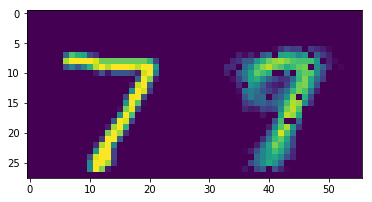

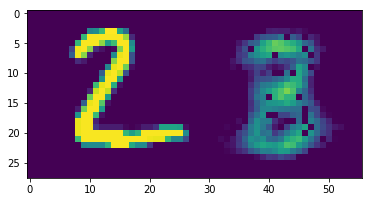

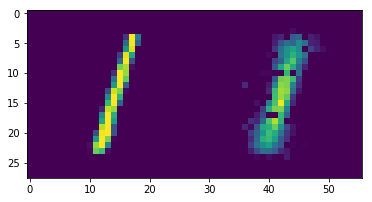

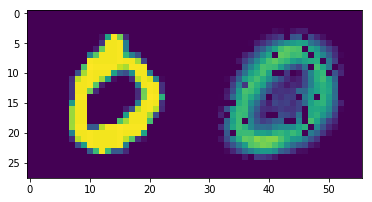

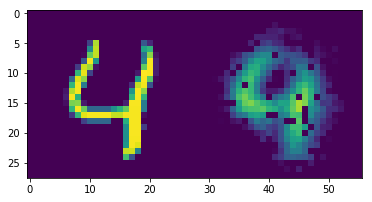

In [35]:
for i in range(5):
    # mnist.test.images[i,:] 只有一維 [784]
    # x 是二維的[影像數量, 影像維度]，因此需增加維度 -> [1, 784]
    input_im  = np.expand_dims(mnist.test.images[i,:], axis = 0)
    output_im = sess.run(output_layer, feed_dict = {x: input_im})
    
    input_im  = np.reshape(input_im,  [28, 28])
    output_im = np.reshape(output_im, [28, 28])
    
    compare_im = np.concatenate([input_im, output_im], axis = 1)
    plt.imshow(compare_im)
    plt.show()